Student Performance Analysis – Summary

Objective:
To analyze how students’ academic performance is influenced by factors such as gender, parental education, lunch type, and test preparation.

Dataset Overview:

Rows: 1000 students

Columns:

GENDER

GROUP (Ethnic group)

PARENT'S EDUCATION

LUNCH

TEST PREP

MATH SCORE

READING SCORE

WRITING SCORE

Tools & Libraries:

Python (Pandas, NumPy)

Matplotlib & Seaborn (Data Visualization)

Jupyter Notebook

Key Questions Explored:

Does test preparation improve student scores?

Are there performance gaps between male and female students?

How does parental education level affect student performance?

What is the correlation between Math, Reading, and Writing scores?

Major Insights:

Test Preparation leads to significantly higher scores across all subjects.

Female students perform better in Reading and Writing; Males slightly better in Math.

Students with higher parental education levels score higher on average.

Students who had standard lunch performed better than those with free/reduced lunch.

Strong positive correlation between Reading and Writing scores (0.95).

Group E students consistently outperformed others.

Low scorers (score < 60 in any subject) mostly did not complete the test preparation course.

Visualizations Used:

Histograms for score distributions

Pie charts for gender and test prep ratios

Bar charts comparing scores by gender, test prep, and education

Correlation heatmap for Math, Reading, Writing scores

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("StudentsPerformance.csv")

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [9]:
df.rename(columns={"race/ethnicity":"group","parental level of education":"parent's education","test preparation course":"test prep"},inplace=True)

In [10]:
df.head()

,gender,group,parent's education,lunch,test prep,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.columns=df.columns.str.upper()

In [12]:
df

,GENDER,GROUP,PARENT'S EDUCATION,LUNCH,TEST PREP,MATH SCORE,READING SCORE,WRITING SCORE
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


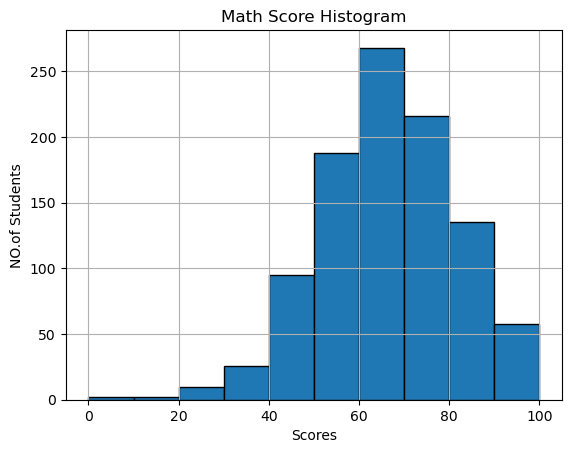

In [15]:
plt.hist(df['MATH SCORE'], bins=10,edgecolor="black")
plt.title("Math Score Histogram")
plt.xlabel("Scores")
plt.ylabel("NO.of Students")
plt.grid()

Text(0, 0.5, 'NO.of Students')

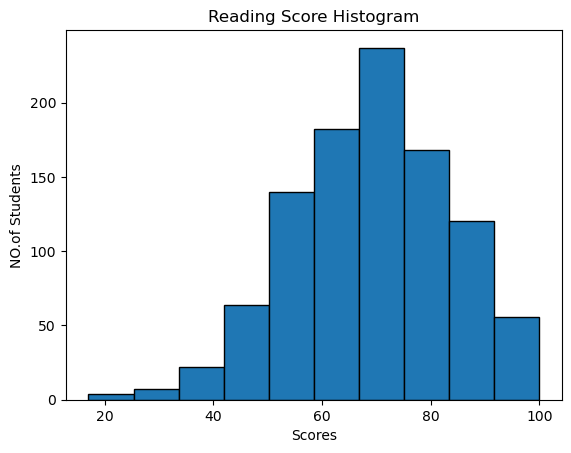

In [16]:
plt.hist(df['READING SCORE'],bins=10,edgecolor="black")
plt.title("Reading Score Histogram")
plt.xlabel("Scores")
plt.ylabel("NO.of Students")

Text(0, 0.5, 'NO.of Students')

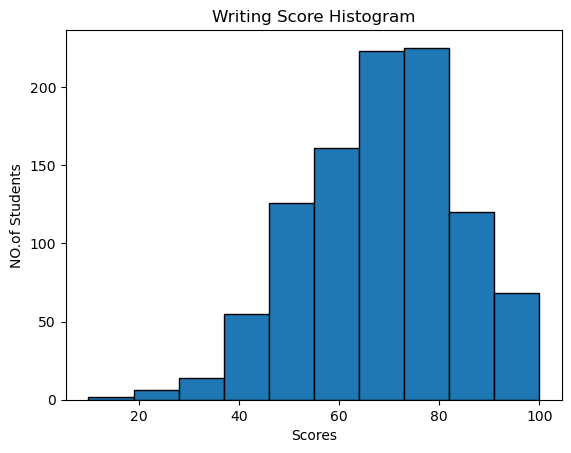

In [17]:
plt.hist(df['WRITING SCORE'],bins=10,edgecolor="black",)
plt.title("Writing Score Histogram")
plt.xlabel("Scores")
plt.ylabel("NO.of Students")

Insights
math above 250 students scored between 60-70
reading above 200 students scored between 65-75
writing above 200 students scored between 65-85


In [18]:
gender_count=df['GENDER'].value_counts()

In [19]:
gender_count

GENDER
female    518
male      482
Name: count, dtype: int64

Insights:

females are more than males  518:482

AttributeError: module 'matplotlib.pyplot' has no attribute 'shadow'

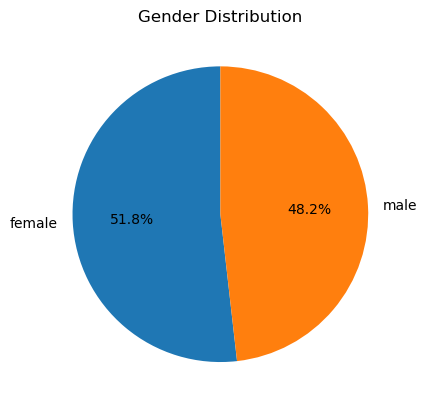

In [20]:
plt.pie(
    gender_count.values,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=90,
)
plt.title("Gender Distribution")
plt.shadow
plt.show()

Insights:

Female is 51.8%
Male is 48.2%



In [84]:
test_prep_count=df['TEST PREP'].value_counts()

In [85]:
test_prep_count

TEST PREP
none         642
completed    358
Name: count, dtype: int64

Text(0.5, 1.0, 'Test prep Pie chart')

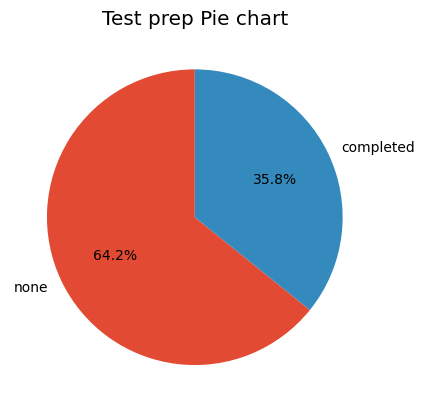

In [93]:
plt.pie(test_prep_count.values,
labels=test_prep_count.index,
autopct='%1.1f%%',
startangle=90)   
plt.title("Test prep Pie chart")     
       
      


Insights:
35.8% of students completed the test preparation course

64.2% of students did not complete it

The majority of students skipped test preparation

This may have a negative impact on their academic performance

In [33]:
math_test_avg=df.groupby('TEST PREP')['MATH SCORE'].mean()

In [34]:
math_test_avg

TEST PREP
completed    69.695531
none         64.077882
Name: MATH SCORE, dtype: float64

Text(0.5, 1.0, 'Math Score VS Test Prep')

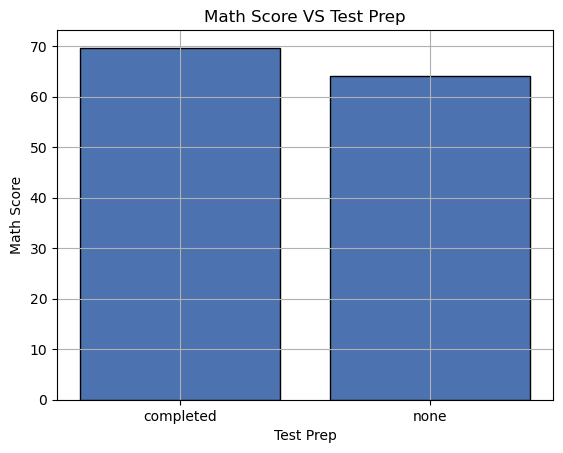

In [197]:
plt.bar(math_test_avg.index, math_test_avg.values,edgecolor="black",color = '#4c72b0')
plt.grid()
plt.xlabel("Test Prep")
plt.ylabel("Math Score")
plt.title("Math Score VS Test Prep")

Insight: Test Preparation vs. Math Score

Students who completed the test preparation course scored higher on average in math.

The average difference is approximately 8 points compared to those who did not complete the course.

This suggests that completing a test preparation course may have a positive impact on math performance.

In [40]:
reading_test_avg=df.groupby('TEST PREP')['READING SCORE'].mean()

In [41]:
reading_test_avg

TEST PREP
completed    73.893855
none         66.534268
Name: READING SCORE, dtype: float64

Text(0.5, 1.0, 'Reading Score VS Test Prep')

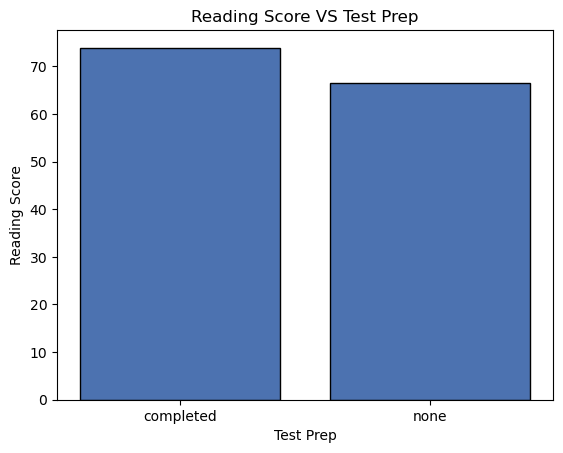

In [198]:
plt.bar(reading_test_avg.index,reading_test_avg.values,edgecolor="black",color = '#4c72b0',)
plt.xlabel("Test Prep")
plt.ylabel("Reading Score")
plt.title("Reading Score VS Test Prep")
plt.grid()

Insight: Test Preparation vs. Reading Score

Students who completed the test preparation course had higher average reading scores.

The difference is approximately 10 points compared to those who did not complete it.

Indicates a strong positive association between test preparation and reading performance.

In [49]:
writing_test_avg=df.groupby('TEST PREP')['WRITING SCORE'].mean()

In [50]:
writing_test_avg

TEST PREP
completed    74.418994
none         64.504673
Name: WRITING SCORE, dtype: float64

Text(0.5, 1.0, 'Writing Score VS Test Prep')

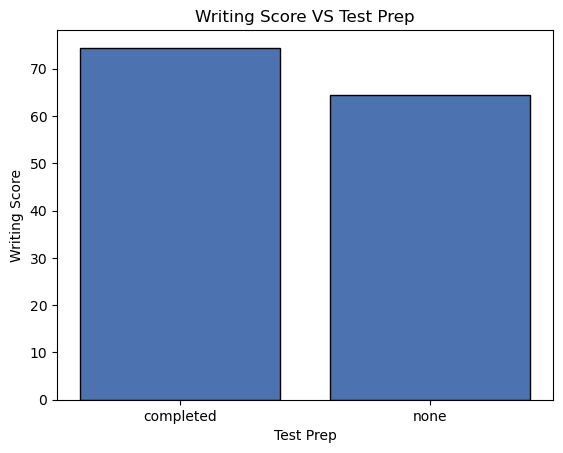

In [199]:
plt.bar(writing_test_avg.index,writing_test_avg.values,edgecolor='black',color = '#4c72b0')
plt.xlabel("Test Prep")
plt.ylabel("Writing Score")
plt.title("Writing Score VS Test Prep")
plt.grid()

Insight: Test Preparation vs. Writing Score

Students who completed the course also performed better in writing.

The average score difference is around 10 points.

Suggests that preparation contributes significantly to writing skills as well.

In [67]:
gender_math=df.groupby('GENDER')['MATH SCORE'].mean()

In [70]:
gender_read=df.groupby('GENDER')['READING SCORE'].mean()

In [69]:
gender_write=df.groupby('GENDER')['WRITING SCORE'].mean()

Text(0.5, 1.0, 'Math Score VS Gender')

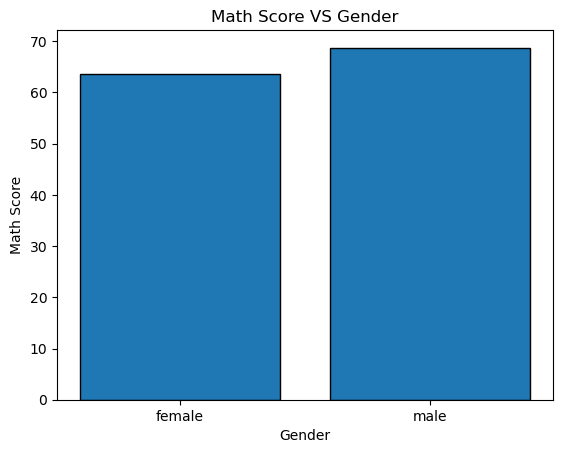

In [174]:
plt.bar(gender_math.index,gender_math.values,edgecolor='black')
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.title("Math Score VS Gender")
plt.grid()

✅ Insight: Gender vs. Math Score
Male students have a higher average math score than females.

The difference is approximately 4 points.

This may suggest stronger performance in quantitative reasoning among males in this dataset.

Text(0.5, 1.0, 'Reading score VS Gender')

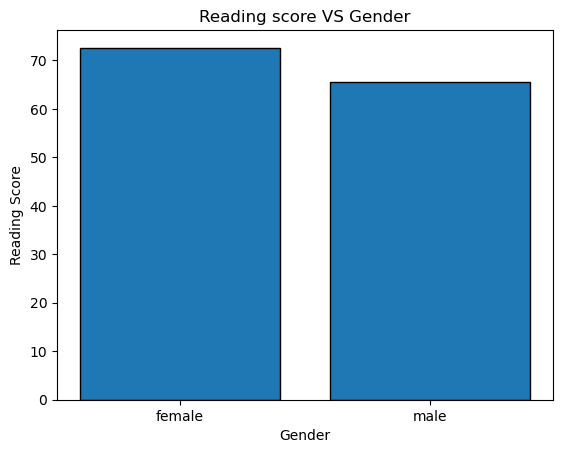

In [177]:
plt.bar(gender_read.index,gender_read.values,edgecolor='black')
plt.xlabel("Gender")
plt.ylabel("Reading Score")
plt.title("Reading score VS Gender")
plt.grid

✅ Insight: Gender vs. Reading Score

Female students outperform males in reading.

The average difference is around 7 points.

Indicates stronger reading comprehension among female students.



Text(0.5, 1.0, 'Writing score VS Gender')

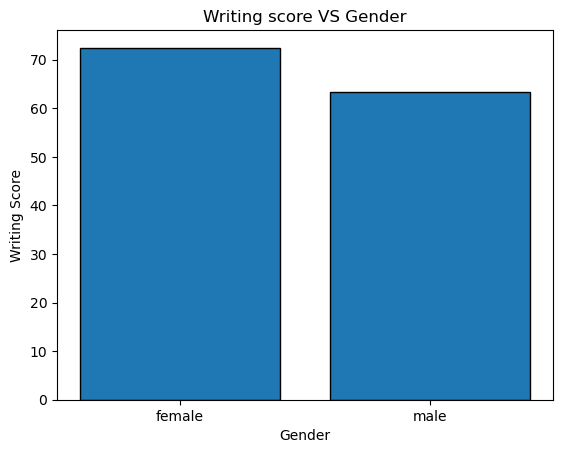

In [178]:
plt.bar(gender_write.index,gender_write.values,edgecolor='black')
plt.xlabel("Gender")
plt.ylabel("Writing Score")
plt.title("Writing score VS Gender")
plt.grid()

✅ Insight: Gender vs. Writing Score

Female students also have higher average writing scores.

The gap is approximately 8 points.

Suggests better writing ability or expression skills among females.



In [74]:
df.head(2)

,GENDER,GROUP,PARENT'S EDUCATION,LUNCH,TEST PREP,MATH SCORE,READING SCORE,WRITING SCORE
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [77]:
parental_math=df.groupby("PARENT'S EDUCATION")["MATH SCORE"].mean()

In [78]:
parental_math

PARENT'S EDUCATION
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: MATH SCORE, dtype: float64

Text(0.5, 1.0, "Math Score VS PARENT'S EDUCATION")

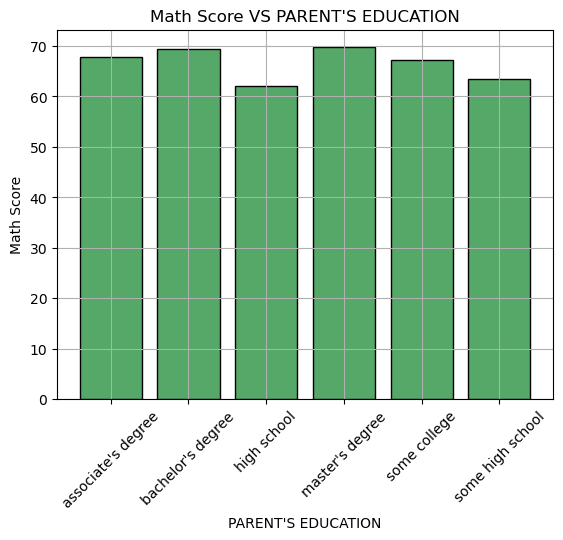

In [191]:
plt.bar(parental_math.index,parental_math.values,edgecolor='black',color = '#55a868')
plt.xticks(rotation=45) 
plt.grid()
plt.xlabel("PARENT'S EDUCATION")
plt.ylabel("Math Score")
plt.title("Math Score VS PARENT'S EDUCATION")

✅ Insight: Parental Education vs. Math Score

Students whose parents hold a master’s degree scored the highest in math on average.

There appears to be a positive correlation between parental education and student math performance.

This trend suggests that higher parental education may create a more supportive academic environment.



In [91]:
parental_read=df.groupby("PARENT'S EDUCATION")["READING SCORE"].mean()

Text(0.5, 1.0, "Reading Score VS PARENT'S EDUCATION")

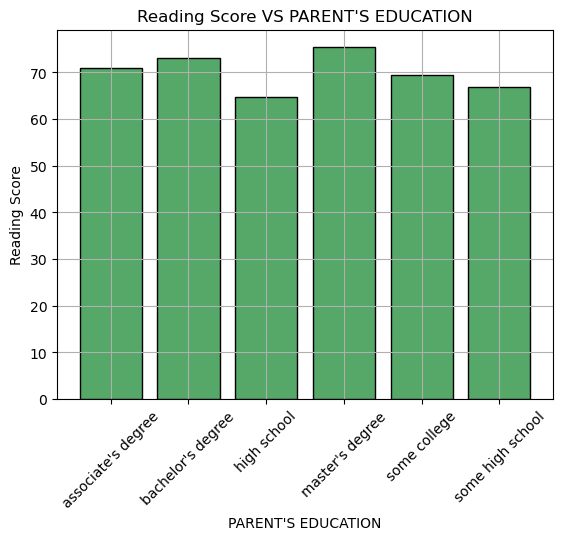

In [190]:
plt.bar(parental_read.index,parental_read.values,edgecolor='black',color = '#55a868')
plt.xticks(rotation=45) 
plt.grid()
plt.xlabel("PARENT'S EDUCATION")
plt.ylabel("Reading Score")
plt.title("Reading Score VS PARENT'S EDUCATION")

✅ Insight: Parental Education vs. Reading Score

Students whose parents have a master’s degree again scored the highest in reading.

A consistent upward trend is visible — as parental education increases, reading scores improve.

This reinforces the idea that more educated parents may foster better language and comprehension skills.

In [95]:
parental_writing=df.groupby("PARENT'S EDUCATION")["WRITING SCORE"].mean()

Text(0.5, 1.0, "Writing Score VS PARENT'S EDUCATION")

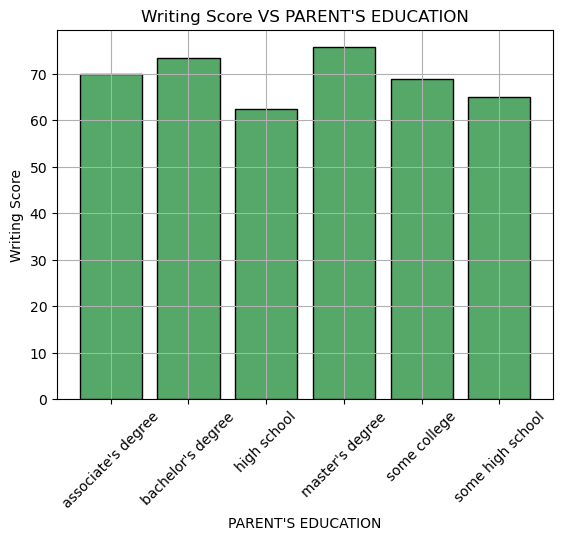

In [192]:
plt.bar(parental_writing.index,parental_writing.values,edgecolor='black',color = '#55a868')
plt.xticks(rotation=45)
plt.grid()
plt.xlabel("PARENT'S EDUCATION")
plt.ylabel("Writing Score")
plt.title("Writing Score VS PARENT'S EDUCATION")

✅ Insight: Parental Education vs. Writing Score

Highest writing scores are also observed among students with parents holding a master’s degree.

The pattern remains strong: higher parental education → better writing performance.

This may reflect greater exposure to reading/writing practices at home.

In [100]:
df.head(1)

,GENDER,GROUP,PARENT'S EDUCATION,LUNCH,TEST PREP,MATH SCORE,READING SCORE,WRITING SCORE
0,female,group B,bachelor's degree,standard,none,72,72,74


In [106]:
lunch_math=df.groupby("LUNCH")["MATH SCORE"].mean()

In [104]:
lunch_read=df.groupby("LUNCH")["READING SCORE"].mean()

In [105]:
lunch_write=df.groupby("LUNCH")["WRITING SCORE"].mean()

Text(0.5, 1.0, 'Math Score VS Lunch')

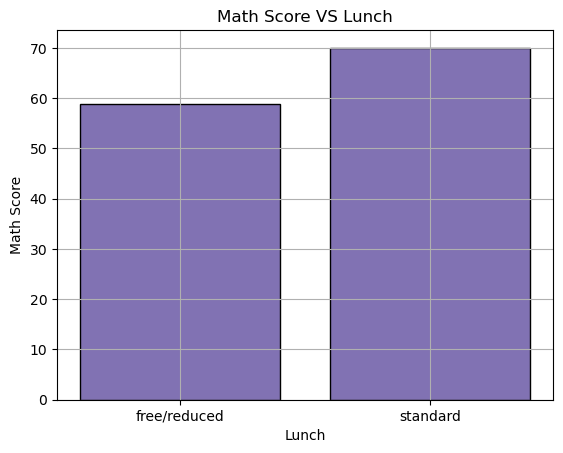

In [194]:
plt.bar(lunch_math.index,lunch_math.values,edgecolor='black',color = '#8172b3')
plt.grid()
plt.xlabel("Lunch")
plt.ylabel("Math Score")
plt.title("Math Score VS Lunch")

✅ Insight: Lunch Type vs. Math Score

Students who had standard lunch scored higher in math compared to those with free/reduced lunch.

The gap suggests that better nutrition or associated socioeconomic conditions may contribute positively to math performance.

Text(0.5, 1.0, 'Reading Score VS Lunch')

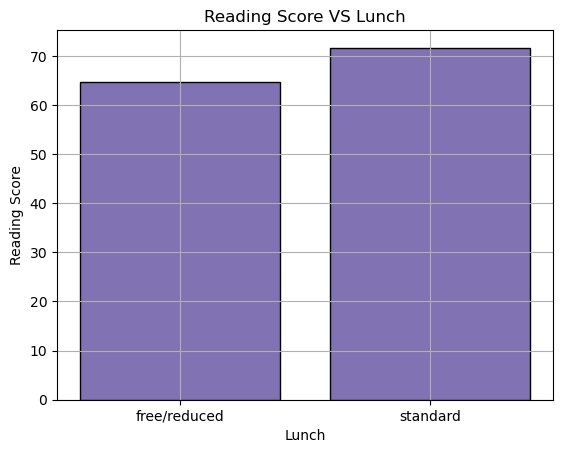

In [195]:
plt.bar(lunch_read.index,lunch_read.values,edgecolor='black',color = '#8172b3')
plt.grid()
plt.xlabel("Lunch")
plt.ylabel("Reading Score")
plt.title("Reading Score VS Lunch")

✅ Insight: Lunch Type vs. Reading Score

Students with standard lunch also outperformed others in reading.

This trend may indicate better focus and cognitive engagement tied to nutrition quality.

Text(0.5, 1.0, 'Writing Score VS Lunch')

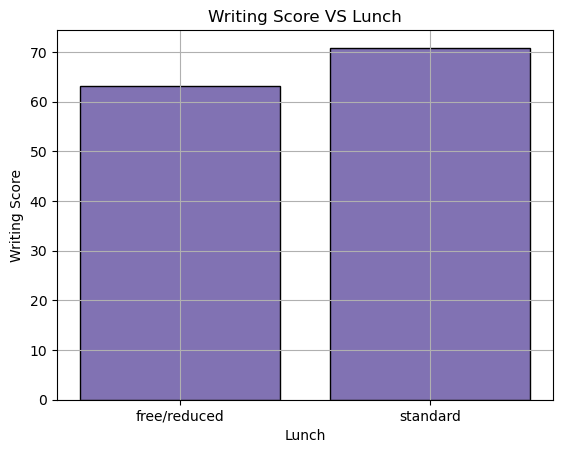

In [196]:
plt.bar(lunch_write.index,lunch_write.values,edgecolor='black',color = '#8172b3')
plt.grid()
plt.xlabel("Lunch")
plt.ylabel("Writing Score")
plt.title("Writing Score VS Lunch")

✅ Insight: Lunch Type vs. Writing Score

Writing scores were higher among students with standard lunch.

This consistent pattern across all subjects implies that access to better meals can support academic outcomes.



In [110]:
df.head(1)

,GENDER,GROUP,PARENT'S EDUCATION,LUNCH,TEST PREP,MATH SCORE,READING SCORE,WRITING SCORE
0,female,group B,bachelor's degree,standard,none,72,72,74


In [112]:
group_math=df.groupby("GROUP")["MATH SCORE"].mean()

In [113]:
group_read=df.groupby("GROUP")["READING SCORE"].mean()

In [114]:
group_write=df.groupby("GROUP")["WRITING SCORE"].mean()

Text(0.5, 1.0, 'Math Score VS Group')

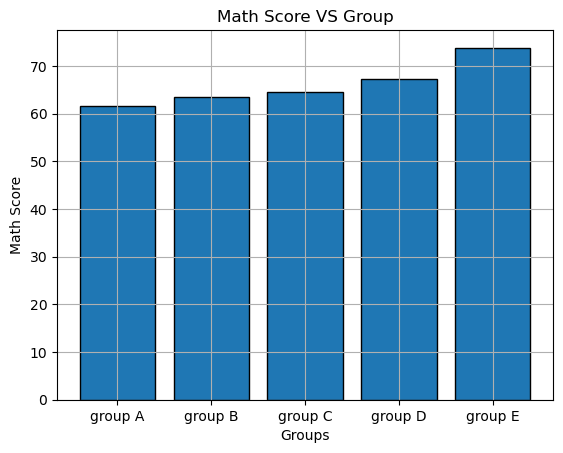

In [186]:
plt.bar(group_math.index,group_math.values,edgecolor='black')
plt.grid()
plt.xlabel("Groups")
plt.ylabel("Math Score")
plt.title("Math Score VS Group")

✅ Insight: Race/Ethnicity vs. Math Score

Students from Group E had the highest average math scores among all race/ethnicity groups.

This suggests that Group E may have better access to resources or academic support.



Text(0.5, 1.0, 'Reading Score VS Group')

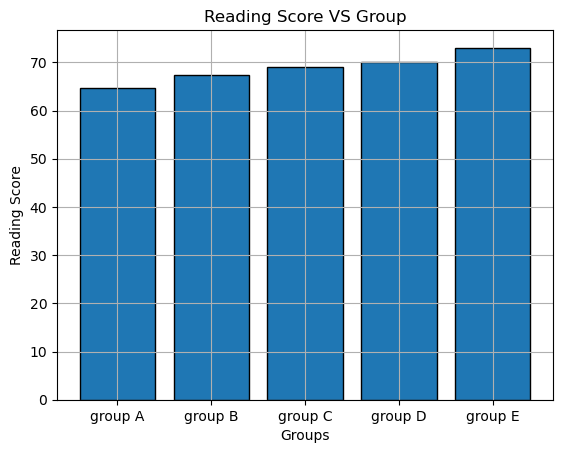

In [187]:
plt.bar(group_read.index,group_read.values,edgecolor='black')
plt.grid()
plt.xlabel("Groups")
plt.ylabel("Reading Score")
plt.title("Reading Score VS Group")

✅ Insight: Race/Ethnicity vs. Reading Score

Again, Group E led in reading scores, maintaining strong performance across subjects.

This may reflect stronger reading habits, home support, or educational background.

Text(0.5, 1.0, 'Writing Score VS Group')

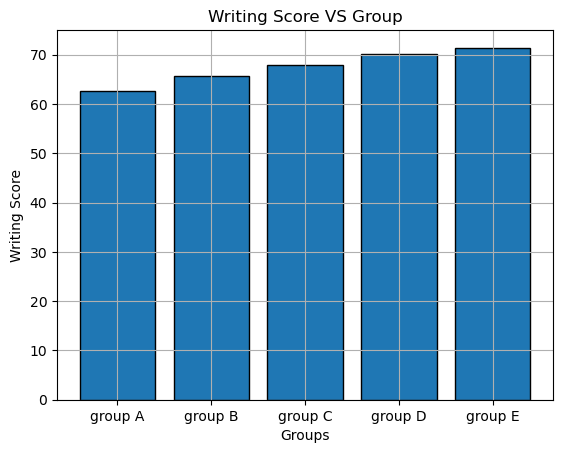

In [188]:
plt.bar(group_write.index,group_write.values,edgecolor='black')
plt.grid()
plt.xlabel("Groups")
plt.ylabel("Writing Score")
plt.title("Writing Score VS Group")

✅ Insight: Race/Ethnicity vs. Writing Score
Group E also topped writing scores, indicating a consistently high academic profile.

The trend highlights Group E as the most academically performing group in the dataset.


🔹 Univariate Analysis
This means analyzing one variable at a time.

🔹 Bivariate Analysis
This means analyzing the relationship between two variables.

In [120]:
correlation=df[['MATH SCORE','READING SCORE','WRITING SCORE']].corr()

In [121]:
correlation

,MATH SCORE,READING SCORE,WRITING SCORE
MATH SCORE,1.000000,0.817580,0.802642
READING SCORE,0.817580,1.000000,0.954598
WRITING SCORE,0.802642,0.954598,1.000000


Insights:

All three scores are strongly positively correlated.

Reading & Writing have the highest correlation (0.95)

Students who score well in one subject tend to perform well in the others too.

In [139]:
low_scorer=(df['MATH SCORE']<60) | (df['READING SCORE']<60) | (df['WRITING SCORE']<60)

In [143]:
low_df_scores=df[low_scorer]

In [153]:
low_df_scores.head(5)

,GENDER,GROUP,PARENT'S EDUCATION,LUNCH,TEST PREP,MATH SCORE,READING SCORE,WRITING SCORE
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
9,female,group B,high school,free/reduced,none,38,60,50
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43


In [145]:
low_df_scores.shape

(397, 8)

In [156]:
low_df_scores['TEST PREP'].value_counts()

TEST PREP
none         296
completed    101
Name: count, dtype: int64

In [151]:
low_df_scores.groupby('TEST PREP')[['MATH SCORE','READING SCORE','WRITING SCORE']].mean()

,MATH SCORE,READING SCORE,WRITING SCORE
TEST PREP,,,
completed,52.891089,58.881188,60.108911
none,51.841216,54.898649,52.395270


📌 Insight:

Low scorers who completed the test preparation course performed better in all subjects — especially in reading (+4 pts) and writing (+7.7 pts) — compared to those who didn’t.

Test prep clearly benefits struggling students.

Text(0.5, 1.0, 'Score Correlation Heatmap')

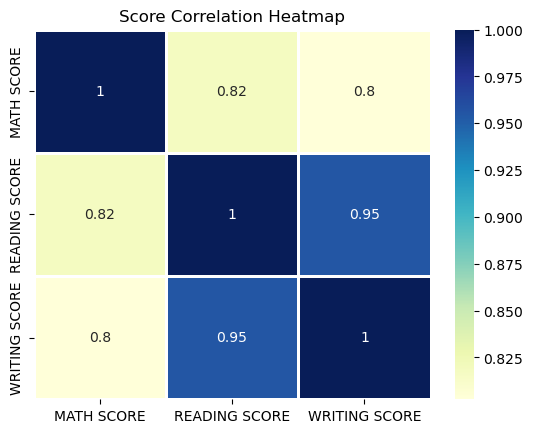

In [168]:
sns.heatmap(correlation,cmap="YlGnBu",linewidths=1,annot=True)
plt.title("Score Correlation Heatmap")

Insight:

The heatmap reveals a strong positive correlation among all three subjects:

Reading and Writing scores show the highest correlation (0.95), suggesting strong overlap in language skills.

Math scores also correlate well with Reading (0.82) and Writing (0.80), indicating that overall academic performance tends to rise together.

PROBLEM STATEMENT:
To analyze how students' performance in Math, Reading, and Writing is affected by:

Their demographic attributes

Parental education

Test preparation

Lunch type and other routine-related factors.

The goal is to identify trends, correlations, and factors that significantly impact academic performance.

Key Questions
1.What are the average scores in Math, Reading, and Writing?
→ Math: ~66.0 | Reading: ~69.2 | Writing: ~68.1

2.How does test preparation impact performance in each subject?
→ Students who completed the test prep scored significantly higher across all subjects (~8–10 point difference).

3.Is there a gender gap in academic performance?
→ Yes.

Males score slightly higher in Math.

Females outperform males in Reading and Writing.

4.Does parental education level correlate with performance?
→ Yes.

Students with parents holding a master’s degree perform the best.

There's a positive trend: higher parental education → higher student scores.

5.Which ethnic group shows the highest or lowest average scores?
→ Group E performs the best across all subjects, followed by Group D.
→ Group A consistently has the lowest scores.

6.Are students with standard lunch performing better?
→ Yes.

Students with standard lunch have higher average scores compared to those with free/reduced lunch.

7.What is the correlation between Math, Reading, and Writing scores?
→ Strong positive correlation:

Reading vs Writing: 0.95

Math vs Reading: 0.82

Math vs Writing: 0.80

8.Which students are low performers (scoring <60)?
→ Total low scorers: 397 out of 1000

Most low scorers did not complete the test prep course.

9.How does test prep status differ among low performers?
→ Among 397 low performers:

   296 did not complete test prep

   101 had completed it
→ Suggests test prep reduces likelihood of poor performance.

Conclusion:

Student performance is strongly influenced by preparation, background, and socio-economic factors.

This kind of analysis can help in designing better support programs for students.

